# One sample

In [1]:
import scipy.stats

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import pandas as pd

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


In [2]:
# load data
df = pd.read_csv('data/human_body_temperature.csv')  ## make change here
# set random seed
np.random.seed(1999)

In [3]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
testmean = 98  ## make change here

In [5]:
#column interested   ### make change here
dataname = df.temperature

In [16]:
dataname.mean(), dataname.std()

(98.24923076923078, 0.7331831580389454)

# 1) Histogram of the data, and normality test

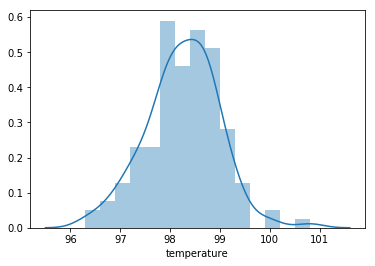

In [6]:
#histogram 
sns.distplot(dataname,bins=15)
plt.show()

In [7]:
# Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
scipy.stats.shapiro(dataname, a=None, reta=False)

(0.9865770936012268, 0.233174666762352)

# 2) One sample t-test

In [8]:
# one sample t-test
scipy.stats.ttest_1samp(dataname, testmean, nan_policy='propagate')

Ttest_1sampResult(statistic=3.8757954972058979, pvalue=0.00016833375945130567)

# 3) Sampling, CI, SE

In [9]:
def text(x, y, s):
    """Plot a string at a given location in axis coordinates.
    
    x: coordinate
    y: coordinate
    s: string
    """
    ax = plt.gca()
    plt.text(x, y, s,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

In [10]:
# resampling: 
# use the sample itself as a model of the population distribution and draw samples from it.
class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean()
    
    def compute_sampling_distribution(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return np.array(stats)
    
    def plot_sampling_distribution(self):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = np.percentile(sample_stats, [5, 95])


        plt.hist(sample_stats)
        plt.xlabel('sample mean')
        plt.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
        text(0.03, 0.85, 'SE %0.2f' % se)
        plt.show()

In [11]:
#std resempler
class StdResampler(Resampler):   
    """Computes the sampling distribution of the standard deviation."""
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.std()
    
    def plot_sampling_distribution(self):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = np.percentile(sample_stats, [5, 95])


        plt.hist(sample_stats)
        plt.xlabel('sample std')
        plt.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
        text(0.03, 0.85, 'SE %0.2f' % se)
        plt.show()
   

In [12]:
def interact_func_mean (n, xlim):
    sample = population.rvs(n)
    resampler = Resampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()

def interact_func_std(n, xlim):
    sample = population.rvs(n)
    resampler = StdResampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()

In [13]:
population = scipy.stats.norm(dataname.mean(), dataname.std())

In [14]:
# The sample mean with confidence interval and standard error.
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func_mean, n=slider, xlim=fixed([97.8, 98.7]))
None

In [15]:
# The standard deviation with CI and SE
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func_std, n=slider, xlim=fixed([0.4, 1]))
None